In [145]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.text import Tokenizer
# Setting seed for reproducibiltiy
SEED = 42
keras.utils.set_random_seed(SEED)

In [146]:
train=pd.read_csv('/kaggle/input/tamil-troll/train_captions.csv',sep=',')
train.head(15)


,Unnamed: 0,imagename,captions
0,0,Not_troll_0.jpg,Ada pikkalipayalugala
1,1,Not_troll_1.jpg,Etho sambavam nadandhirukkum pola
2,2,Not_troll_10.jpg,Vunnayellam frienda vechirukken paaru
3,3,Not_troll_100.jpg,Idho! Ivan dhaan naan nasama ponadhukku kaaranam
4,4,Not_troll_1000.jpg,Ennada lusu thanama pesikittu irukka lusu payale
5,5,Not_troll_1001.jpg,Vuhvuhvuhvuhvuh........
6,6,Not_troll_1002.jpg,Yenna ore pattasu sathama kekkudhu..Ohhoo.. in...
7,7,Not_troll_1003.jpg,Inimel ipidi post pottal vailaye vettuven
8,8,Not_troll_1004.jpg,Ivaingakittarundhu yepidi thapikka porenanu th...
9,9,Not_troll_1005.jpg,(no caption)


In [147]:
test=pd.read_csv('/kaggle/input/tamil-troll/test_captions.csv',sep=',')
test.head(15)


,Unnamed: 0,imagename,captions,label
0,0,test_img_0.jpg,sugarkaga nadandhava vida figuregaga nadandhav...,troll
1,1,test_img_1.jpg,i have come for my stones stones thaane.....,troll
2,2,test_img_2.jpg,"""special porotta"" nu pottuierukke spacial kum ...",troll
3,3,test_img_3.jpg,*we : amma .. cooker 3 whistle vanthuchu off p...,troll
4,4,test_img_4.jpg,creating whatsapp group - 1st day vaanga ji.. ...,troll
5,5,test_img_5.jpg,*FOODIE : YAARUM PAARKKAMAL ENNAI PAARKIREN EN...,troll
6,6,test_img_6.jpg,MARGALI MAADHA EFFECT YENNA KULLURU,troll
7,7,test_img_7.jpg,YENNAMMA FEEL PANNI YELUTHI ERUKRANDA AVAN,troll
8,8,test_img_8.jpg,TAMIL SERIALS BE LIKE... INI AVARUKKU BADHIL.....,not_troll
9,9,test_img_9.jpg,Mama ponnu Expectation reality,troll


In [148]:
# setting labels
def labeling(train):
  train['Label'] = train['imagename'].str.replace('\d+', '')
  train['Label'] = train['Label'].str.replace('_.jpg', '')
  train['Label'] = train['Label'].str.replace('_.png', '')
  return train['Label']
train['Label']= labeling(train)
test['Label']= labeling(test)

/tmp/ipykernel_28/2743666571.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Label'] = train['imagename'].str.replace('\d+', '')
/tmp/ipykernel_28/2743666571.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Label'] = train['Label'].str.replace('_.jpg', '')
/tmp/ipykernel_28/2743666571.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Label'] = train['Label'].str.replace('_.png', '')
/tmp/ipykernel_28/2743666571.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Label'] = train['imagename'].str.replace('\d+', '')
/tmp/ipykernel_28/2743666571.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Label'] = train['Label'].str.replace('_.jpg', '')
/tmp/ipykernel_28/2743666571.py:5: FutureWarning: The de

In [149]:
train

,Unnamed: 0,imagename,captions,Label
0,0,Not_troll_0.jpg,Ada pikkalipayalugala,Not_troll
1,1,Not_troll_1.jpg,Etho sambavam nadandhirukkum pola,Not_troll
2,2,Not_troll_10.jpg,Vunnayellam frienda vechirukken paaru,Not_troll
3,3,Not_troll_100.jpg,Idho! Ivan dhaan naan nasama ponadhukku kaaranam,Not_troll
4,4,Not_troll_1000.jpg,Ennada lusu thanama pesikittu irukka lusu payale,Not_troll
...,...,...,...,...
2295,2345,troll_439.jpg,amma yaaro orutharu... pattu paaduraaruma......,troll
2296,2346,troll_44.jpg,Phone n Twitter hacked please don't respond ...,troll
2297,2347,troll_440.jpg,Respected deat @narendramodi ji hearty corigr...,troll
2298,2348,troll_441.jpg,Engu irutha nan mnnil piranthidum bothu vera...,troll


In [150]:
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

# function for encoding labels
def encodelabels(labels):  
  labels =  Encoder.fit_transform(labels)                                                      
  return labels

In [151]:
train['Label'] = encodelabels(train['Label'])

In [152]:
test['Label'] = encodelabels(test['Label'])

In [153]:
print(train['Label'])

0       0
1       0
2       0
3       0
4       0
       ..
2295    1
2296    1
2297    1
2298    1
2299    1
Name: Label, Length: 2300, dtype: int64


In [154]:
print(test['Label'])

0      0
1      0
2      0
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Label, Length: 667, dtype: int64


In [155]:
# DATA
BUFFER_SIZE = 512
BATCH_SIZE = 256

# AUGMENTATION
IMAGE_SIZE=72
PATCH_SIZE = 6
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

# TRAINING
EPOCHS = 10

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 8
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [2048, 1024]

In [156]:
# training input in array
img_size = 72
train_image_dir = '/kaggle/input/tamil-troll/uploaded_tamil_memes 1/uploaded_tamil_memes 1'
# train_image_array = create_dataset(train_image_dir)
# train_image_array.shape

train_image_files = os.listdir(train_image_dir)


# Create an empty array to store the images
train_images_array = np.zeros((len(train_image_files), img_size, img_size, 3), dtype=np.uint8)



# Loop through the training images and load them into the array
for i, file in enumerate(train_image_files):
    img = cv2.imread(os.path.join(train_image_dir, file))
    img = cv2.resize(img, (img_size, img_size))
    train_images_array[i] = img

In [157]:
# training input in array
img_size = 72
test_image_dir = '/kaggle/input/tamil-troll/uploaded_tamil_memes 1/test_img'
# train_image_array = create_dataset(train_image_dir)
# train_image_array.shape

test_image_files = os.listdir(test_image_dir)


# Create an empty array to store the images
test_images_array = np.zeros((len(test_image_files), img_size, img_size, 3), dtype=np.uint8)



# Loop through the training images and load them into the array
for i, file in enumerate(test_image_files):
    img = cv2.imread(os.path.join(test_image_dir, file))
    img = cv2.resize(img, (img_size, img_size))
    test_images_array[i] = img

In [158]:
len(train_images_array)

2300

In [159]:
len(test_images_array)

667

In [160]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# x_train, x_test,y_train, y_test = train_test_split(
#     train_images_array,  # Image data
#     train['Label'],      # Labels
#     test_size=0.2,       # Percentage of data to use for testing (e.g., 20%)
#     random_state=42      # Set a random seed for reproducibility
# )

x_train=train_images_array
x_test=test_images_array
y_train=train['Label']
y_test=test['Label']

In [161]:
len(x_train)

2300

In [162]:
len(y_train)

2300

In [163]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [164]:
len(x_train)

2300

In [165]:
class ShiftedPatchTokenization(layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vanilla = vanilla  # Flag to swtich to vanilla patch extractor
        self.image_size = image_size
        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = layers.Reshape((num_patches, -1))
        self.projection = layers.Dense(units=projection_dim)
        self.layer_norm = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def crop_shift_pad(self, images, mode):
        # Build the diagonally shifted images
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        # Crop the shifted images and pad them
        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size - self.half_patch,
            target_width=self.image_size - self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size,
            target_width=self.image_size,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            # Concat the shifted images with the original image
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1,
            )
        # Patchify the images and flatten it
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            # Layer normalize the flat patches and linearly project it
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            # Linearly project the flat patches
            tokens = self.projection(flat_patches)
        return (tokens, patches)

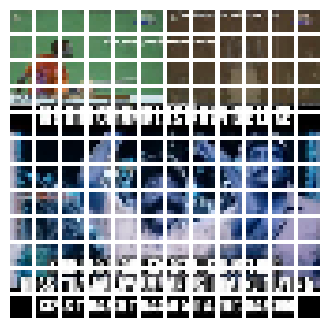

ORIGINAL


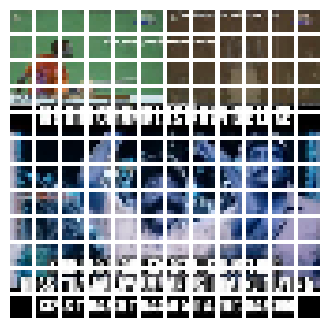

LEFT-UP


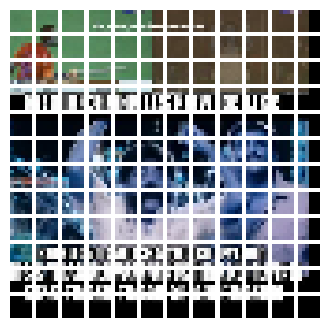

LEFT-DOWN


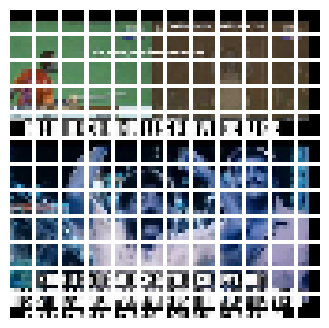

RIGHT-UP


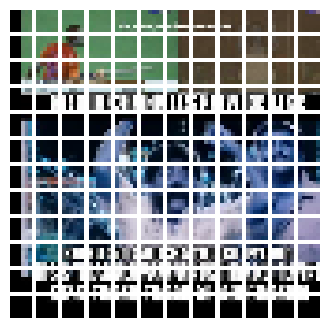

RIGHT-DOWN


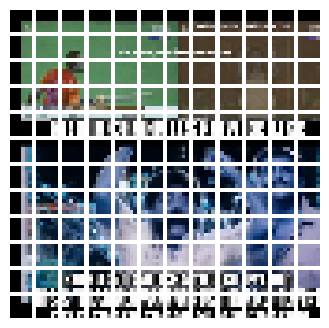

In [166]:
# Get a random image from the training dataset
# and resize the image
image = x_train[np.random.choice(range(x_train.shape[0]))]
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(IMAGE_SIZE, IMAGE_SIZE)
)

# Vanilla patch maker: This takes an image and divides into
# patches as in the original ViT paper
(token, patch) = ShiftedPatchTokenization(vanilla=True)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
count = 1
plt.figure(figsize=(4, 4))
for row in range(n):
    for col in range(n):
        plt.subplot(n, n, count)
        count = count + 1
        image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 3))
        plt.imshow(image)
        plt.axis("off")
plt.show()

# Shifted Patch Tokenization: This layer takes the image, shifts it
# diagonally and then extracts patches from the concatinated images
(token, patch) = ShiftedPatchTokenization(vanilla=False)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
shifted_images = ["ORIGINAL", "LEFT-UP", "LEFT-DOWN", "RIGHT-UP", "RIGHT-DOWN"]
for index, name in enumerate(shifted_images):
    print(name)
    count = 1
    plt.figure(figsize=(4, 4))
    for row in range(n):
        for col in range(n):
            plt.subplot(n, n, count)
            count = count + 1
            image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 5 * 3))
            plt.imshow(image[..., 3 * index : 3 * index + 3])
            plt.axis("off")
    plt.show()

In [167]:
class PatchEncoder(layers.Layer):
    def __init__(
        self, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM, **kwargs
    ):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        self.positions = tf.range(start=0, limit=self.num_patches, delta=1)

    def call(self, encoded_patches):
        encoded_positions = self.position_embedding(self.positions)
        encoded_patches = encoded_patches + encoded_positions
        return encoded_patches

In [168]:
class MultiHeadAttentionLSA(tf.keras.layers.MultiHeadAttention):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # The trainable temperature term. The initial value is
        # the square root of the key dimension.
        self.tau = tf.Variable(math.sqrt(float(self._key_dim)), trainable=True)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)
        attention_scores_dropout = self._dropout_layer(
            attention_scores, training=training
        )
        attention_output = tf.einsum(
            self._combine_equation, attention_scores_dropout, value
        )
        return attention_output, attention_scores

In [169]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


# Build the diagonal attention mask
diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)

In [170]:
def create_vit_classifier(vanilla=False):
    inputs = layers.Input(shape=INPUT_SHAPE)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    (tokens, _) = ShiftedPatchTokenization(vanilla=vanilla)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder()(tokens)

    # Create multiple layers of the Transformer block.
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        if not vanilla:
            attention_output = MultiHeadAttentionLSA(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1, attention_mask=diag_attn_mask)
        else:
            attention_output = layers.MultiHeadAttention(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(NUM_CLASSES)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [171]:
NUM_CLASSES = 2
INPUT_SHAPE = (72, 72, 3)

In [172]:
len(x_train)

2300

In [173]:
len(y_train)

2300

In [174]:
from sklearn.metrics import classification_report

def run_experiment(model, x_train, y_train, x_test, y_test, LEARNING_RATE, WEIGHT_DECAY, BATCH_SIZE, EPOCHS):
    total_steps = int((len(x_train) / BATCH_SIZE) * EPOCHS)
    warmup_epoch_percentage = 0.10
    warmup_steps = int(total_steps * warmup_epoch_percentage)
    scheduled_lrs = WarmUpCosine(
        learning_rate_base=LEARNING_RATE,
        total_steps=total_steps,
        warmup_learning_rate=0.0,
        warmup_steps=warmup_steps,
    )

    optimizer = tfa.optimizers.AdamW(
        learning_rate=scheduled_lrs,
        weight_decay=WEIGHT_DECAY
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
    )
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


# Run experiments with the vanilla ViT
vit = create_vit_classifier(vanilla=True)
history = run_experiment(vit, x_train, y_train, x_test, y_test, LEARNING_RATE, WEIGHT_DECAY, BATCH_SIZE, EPOCHS)

# Run experiments with the Shifted Patch Tokenization and Locality Self Attention modified ViT
vit_sl = create_vit_classifier(vanilla=False)
history = run_experiment(vit_sl, x_train, y_train, x_test, y_test, LEARNING_RATE, WEIGHT_DECAY, BATCH_SIZE, EPOCHS)


Epoch 1/10
9/9 [==============================] - 15s 493ms/step - loss: 2.0161 - accuracy: 0.5077 - top-5-accuracy: 1.0000 - val_loss: 1.6148 - val_accuracy: 0.2130 - val_top-5-accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 3s 332ms/step - loss: 1.4529 - accuracy: 0.5150 - top-5-accuracy: 1.0000 - val_loss: 0.8249 - val_accuracy: 0.5130 - val_top-5-accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 3s 333ms/step - loss: 1.1969 - accuracy: 0.4995 - top-5-accuracy: 1.0000 - val_loss: 1.2383 - val_accuracy: 0.0913 - val_top-5-accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 3s 334ms/step - loss: 0.9692 - accuracy: 0.5164 - top-5-accuracy: 1.0000 - val_loss: 0.4265 - val_accuracy: 0.9391 - val_top-5-accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 3s 336ms/step - loss: 0.9210 - accuracy: 0.4870 - top-5-accuracy: 1.0000 - val_loss: 0.7652 - val_accuracy: 0.5087 - val_top-5-accuracy: 1.0000
Epoch 6/10
9/9 [=============

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 105ms/step - loss: 0.7024 - accuracy: 0.4513 - top-5-accuracy: 1.0000
Test accuracy: 45.13%
Test top 5 accuracy: 100.0%
Epoch 1/10
9/9 [==============================] - 17s 567ms/step - loss: 1.7214 - accuracy: 0.4836 - top-5-accuracy: 1.0000 - val_loss: 1.9092 - val_accuracy: 0.1261 - val_top-5-accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 3s 370ms/step - loss: 1.4236 - accuracy: 0.5193 - top-5-accuracy: 1.0000 - val_loss: 1.1701 - val_accuracy: 0.3261 - val_top-5-accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 3s 371ms/step - loss: 1.1583 - accuracy: 0.5135 - top-5-accuracy: 1.0000 - val_loss: 1.2123 - val_accuracy: 0.0652 - val_top-5-accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 3s 374ms/step - loss: 0.9713 - accuracy: 0.5179 - top-5-accuracy: 1.0000 - val_loss: 0.9768 - val_accuracy: 0.0696 - val_top-5-accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 3s 374ms/st

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 120ms/step - loss: 0.6492 - accuracy: 0.8006 - top-5-accuracy: 1.0000
Test accuracy: 80.06%
Test top 5 accuracy: 100.0%
